In [1]:
import numpy as np 
import pandas as pd 
import json
from pandas.io.json import json_normalize
import os

In [2]:
def load_df(csv_path='/Users/leebarbara/Desktop/PycharmProjects/machinelearning_final/all/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    newcolumns_list=[]
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        newcolumns_list.append(column_as_df.columns)
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df,newcolumns_list

In [3]:
train_small = load_df(nrows=25000)

Loaded train.csv. Shape: (25000, 54)


In [4]:
df_small=train_small[0]
df_small['totals.transactionRevenue']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
24970    NaN
24971    NaN
24972    NaN
24973    NaN
24974    NaN
24975    NaN
24976    NaN
24977    NaN
24978    NaN
24979    NaN
24980    NaN
24981    NaN
24982    NaN
24983    NaN
24984    NaN
24985    NaN
24986    NaN
24987    NaN
24988    NaN
24989    NaN
24990    NaN
24991    NaN
24992    NaN
24993    NaN
24994    NaN
24995    NaN
24996    NaN
24997    NaN
24998    NaN
24999    NaN
Name: totals.transactionRevenue, Length: 25000, dtype: object

In [5]:
# the new generated column names
newcolumns=train_small[1]

In [6]:
colvalue=[]
oldname=['device', 'geoNetwork', 'totals', 'trafficSource']
for col in newcolumns:
    newcol=col.values
    colvalue.append(newcol)
# get all of the new columns from a dictionary
d = dict(zip(oldname,colvalue))
d

{'device': array(['device.browser', 'device.browserSize', 'device.browserVersion',
        'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
        'device.language', 'device.mobileDeviceBranding',
        'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
        'device.mobileDeviceModel', 'device.mobileInputSelector',
        'device.operatingSystem', 'device.operatingSystemVersion',
        'device.screenColors', 'device.screenResolution'], dtype=object),
 'geoNetwork': array(['geoNetwork.city', 'geoNetwork.cityId', 'geoNetwork.continent',
        'geoNetwork.country', 'geoNetwork.latitude', 'geoNetwork.longitude',
        'geoNetwork.metro', 'geoNetwork.networkDomain',
        'geoNetwork.networkLocation', 'geoNetwork.region',
        'geoNetwork.subContinent'], dtype=object),
 'totals': array(['totals.bounces', 'totals.hits', 'totals.newVisits',
        'totals.pageviews', 'totals.transactionRevenue', 'totals.visits'], dtype=object),
 'trafficSource'

In [7]:
df_small["totals.transactionRevenue"] = df_small["totals.transactionRevenue"].astype('float')
gdf =df_small.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
gdf

,fullVisitorId,totals.transactionRevenue
0,0000174067426171406,0.0
1,0000245437374675368,0.0
2,0000750929315523353,0.0
3,0001156383977201253,0.0
4,0001960337656851524,0.0
5,0002113059720701099,0.0
6,0003283007147709573,0.0
7,0004658613138888311,0.0
8,0004803397127474847,0.0
9,0005096736076850458,0.0


In [8]:
import matplotlib.pyplot as plt

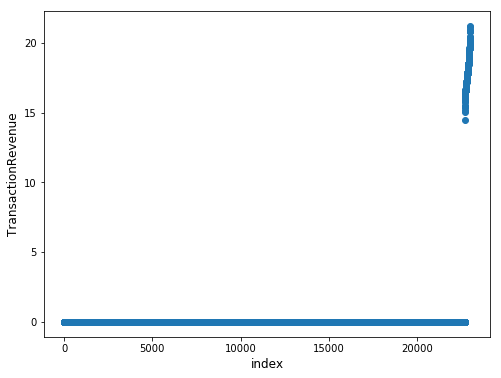

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [10]:
nzi = pd.notnull(df_small["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / df_small.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  301  and ratio is :  0.01204
Number of unique customers with non-zero revenue :  294 and the ratio is :  0.0127692842252


In [11]:
print("Number of unique visitors in train set : ",df_small.fullVisitorId.nunique(), " out of rows : ",df_small.shape[0])

Number of unique visitors in train set :  23024  out of rows :  25000


In [12]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [14]:
# source
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='lanli', api_key='fO5pXtYRLU7HDYAruoYb')

cnt_srs = df_small.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'green')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'green')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'green')

# medium
cnt_srs = df_small.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"], 'pink')
trace5 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'pink')
trace6 = horizontal_bar_chart(cnt_srs["mean"], 'pink')

# Creating two subplots
fig = tools.make_subplots(rows=2, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Traffic Source - Count", "Traffic Source - Non-zero Revenue Count", "Traffic Source - Mean Revenue",
                                          "Traffic Source Medium - Count",  "Traffic Source Medium - Non-zero Revenue Count", "Traffic Source Medium - Mean Revenue"
                                          ])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)

fig['layout'].update(height=1000, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Source Plots")
py.iplot(fig, filename='traffic-source-plots')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lanli/0 or inside your plot.ly account where it is named 'traffic-source-plots'


In [15]:
# totals
ttlist=d['totals']
print(ttlist)
tt_list=['totals.newVisits','totals.visits']
# plot compare newVisits and visits
import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

df_small['date'] = df_small['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
# newVisits
cnt_srs = df_small.groupby('date')['totals.newVisits'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()

#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'red')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'blue')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["newVisits - Count", "newVisits - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="Visits Plots")
py.iplot(fig, filename='date-plots')          

['totals.bounces' 'totals.hits' 'totals.newVisits' 'totals.pageviews'
 'totals.transactionRevenue' 'totals.visits']
This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [16]:
# visits in totals
cnt_srs = df_small.groupby('date')['totals.visits'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()

#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'yellow')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'orange')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["visits - Count", "visits - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="visits_ Plots")
py.iplot(fig, filename='visits-date-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [17]:
# Page views
cnt_srs = df_small.groupby('totals.pageviews')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(60), 'cyan')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'cyan')
trace5 = horizontal_bar_chart(cnt_srs["mean"].head(60), 'cyan')

# Hits
cnt_srs = df_small.groupby('totals.hits')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", 'mean']
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace3 = horizontal_bar_chart(cnt_srs["count"].head(60), 'black')
trace4 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'black')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(60), 'black')

# bounces
cnt_srs = df_small.groupby('totals.bounces')['totals.transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", 'mean']
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(60), 'yellow')
trace8 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(60), 'yellow')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(60), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Total Pageviews - Count", "Total Pageviews - Non-zero Revenue Count", "Total Pageviews - Mean Revenue",
                                           "Total Hits - Count",  "Total Hits - Non-zero Revenue Count", "Total Hits - Mean Revenue",
                                         "Total Bounces - Count",  "Total Bounces - Non-zero Revenue Count", "Total Bounces - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Total Visitor Profile Plots")
py.iplot(fig, filename='visitor-profile-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



In [20]:
# bounces in totals
cnt_srs = df_small.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
cnt_srs.columns = ["count", "count of non-zero revenue"]
cnt_srs = cnt_srs.sort_index()

#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(cnt_srs["count"], 'black')
trace2 = scatter_plot(cnt_srs["count of non-zero revenue"], 'pink')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["bounces - Count", "bounces - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, paper_bgcolor='rgb(233,233,233)', title="bounces_ Plots")
py.iplot(fig, filename='bounces-date-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]

